#### Problem Statement:
An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

Auto Sales Data: Sales_Data.xlsx

In [136]:
# Importing Required Libraries for Analysis
# For Data Manipulations
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import datetime # manipulating date formats

# For Visualisation
import matplotlib.pyplot as plt # for basic plots
plt.style.use('fivethirtyeight') 
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# for train Test split
from sklearn.model_selection import TimeSeriesSplit
# Settings
from warnings import filterwarnings
filterwarnings('ignore')
rcParams['figure.figsize'] = 12,4


In [137]:
#Reading the dataset
df=pd.read_excel('Sales_Data.Xlsx',parse_dates=['ORDERDATE'])

In [138]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


### Exploratory Analysis and Inferences 

In [139]:
# Checking the shape of data
print('The shape of Sales TS data is :', df.shape)

The shape of Sales TS data is : (2747, 20)


In [140]:
# The information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [141]:
# Finding the duplicate in Dataset
#df.duplicated().sum()
print('The duplicate in Sales TS data is :', df.duplicated().sum())

The duplicate in Sales TS data is : 0


In [142]:
# Finding the Null values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

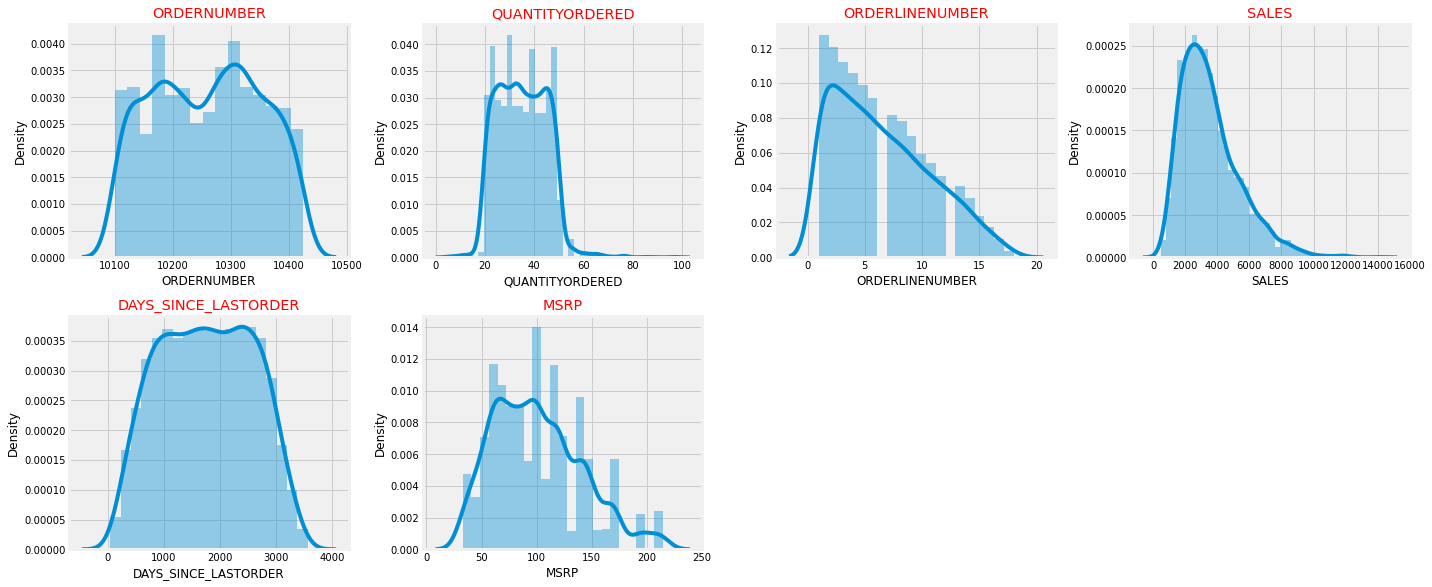

ORDERNUMBER            -0.006995
QUANTITYORDERED         0.369286
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64


In [130]:
# Data Distribution of each variable
#dfnum=df.select_dtypes(["int64","float64"])
df=data_plot
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=True)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 
print(df.skew())

##### Insight
ORDERNUMBER has a slightly negative skewness, which indicates a slightly left-skewed distribution. This means that there are slightly more low order numbers than high order numbers in the data.

QUANTITYORDERED has a positive skewness of 0.369286, which indicates a right-skewed distribution. This means that there are more lower quantities ordered than higher quantities.

PRICEEACH has a higher positive skewness of 0.697222, which indicates a more heavily right-skewed distribution. This means that the majority of the data points are clustered towards the lower end of the distribution with fewer high values.

ORDERLINENUMBER has a positive skewness of 0.575327, indicating a moderately right-skewed distribution.

SALES has a skewness of 1.155940, which is significantly higher than 0 and indicates a highly right-skewed distribution. This means that there are a few high sales values that are significantly larger than the majority of the values.

DAYS_SINCE_LASTORDER has a skewness of -0.002983, which is very close to zero, indicating a nearly symmetrical distribution.

MSRP has a positive skewness of 0.575646, indicating a moderately right-skewed distribution.

In summary, the variables QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, and MSRP all exhibit some degree of right-skewness, while SALES exhibits a highly right-skewed distribution. ORDERNUMBER and DAYS_SINCE_LASTORDER are approximately symmetrical.


In [143]:
# Checking the data description
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


#### Insights:
The average order number is 10259, with a relatively small standard deviation of 92 (Aprox), suggesting that most orders are fairly close in number to each other.

The average quantity ordered is 35, with a standard deviation of 9.76, indicating that the quantity ordered varies more widely than the order number.

The average price of each item ordered is 101, with a standard deviation of 42. This suggests that there is a fair amount of variation in the price of items ordered, with some orders containing more expensive items than others.

The average sales amount per order is 3553, with a standard deviation of 1839. This indicates that there is a wide range of sales amounts, with some orders generating significantly more revenue than others.

The average time since the last order is 1757 days, with a standard deviation of 819 days. This suggests that there is a fair amount of variability in the time between orders, with some customers ordering frequently and others ordering infrequently.

The average MSRP (Manufacturer's Suggested Retail Price) of the items ordered is 100, with a standard deviation of 40. This indicates that there is some variability in the price of the items relative to their MSRP, with some items being priced closer to their MSRP than others.

Overall, these insights provide a basic understanding of the central tendencies and variabilities of the different variables. However, further analysis would be needed to determine any patterns or relationships between the variables and to draw more conclusive insights.


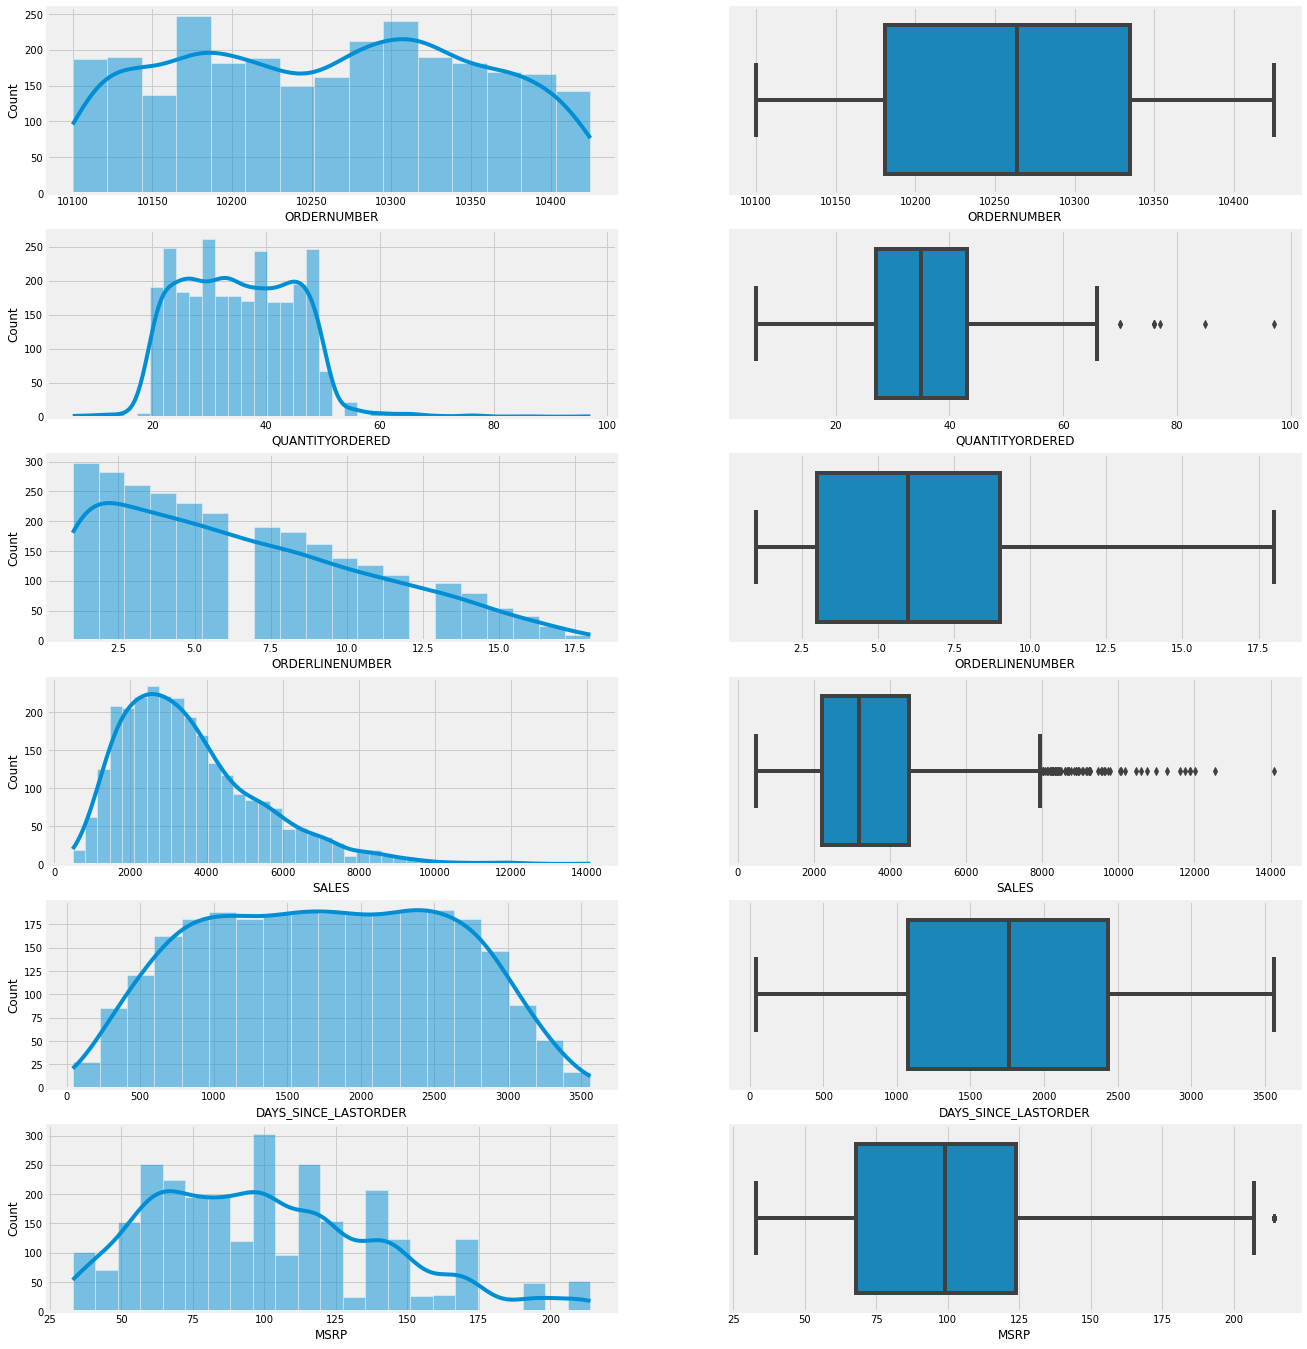

In [132]:
# Univariate Analysis of  numerical data
dfnum=df.select_dtypes(["int64","float64"])
fig, ax= plt.subplots(6,2, figsize=(20,24))
i=0
j=0
for col in dfnum.columns:
    sns.histplot(x=dfnum[col], ax=ax[i][j], kde=True)
    sns.boxplot(x=dfnum[col], ax=ax[i][j+1])
    i=i+1


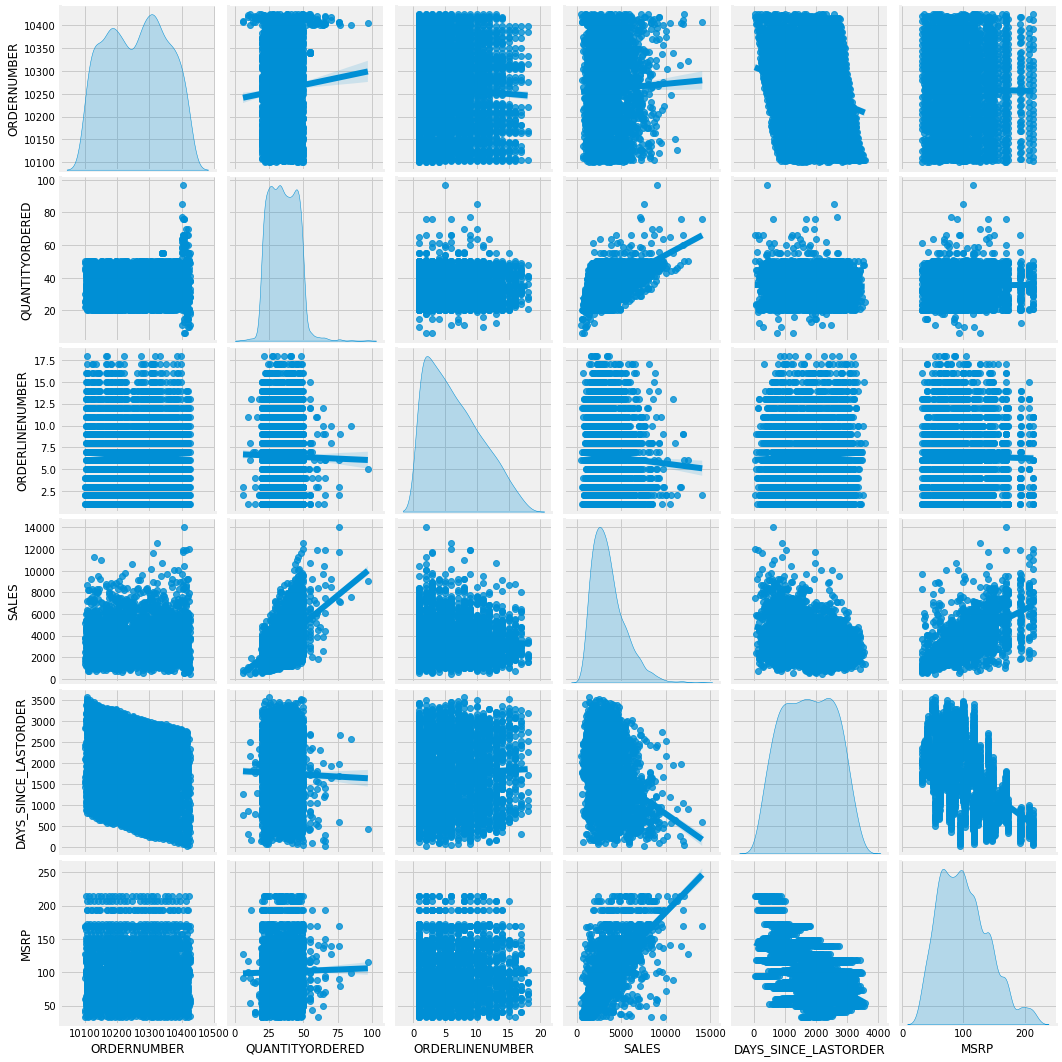

In [113]:
# Bivariate Analysis : Regression line to the  graph to get a better picture
sns.pairplot(data=df,kind='reg', diag_kind='kde')
plt.show()

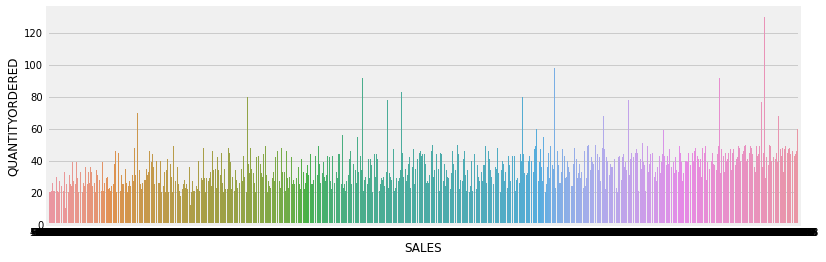

In [116]:
sns.barplot( x='SALES', y='QUANTITYORDERED', estimator = np.sum, data=df, ci=None)
plt.show()

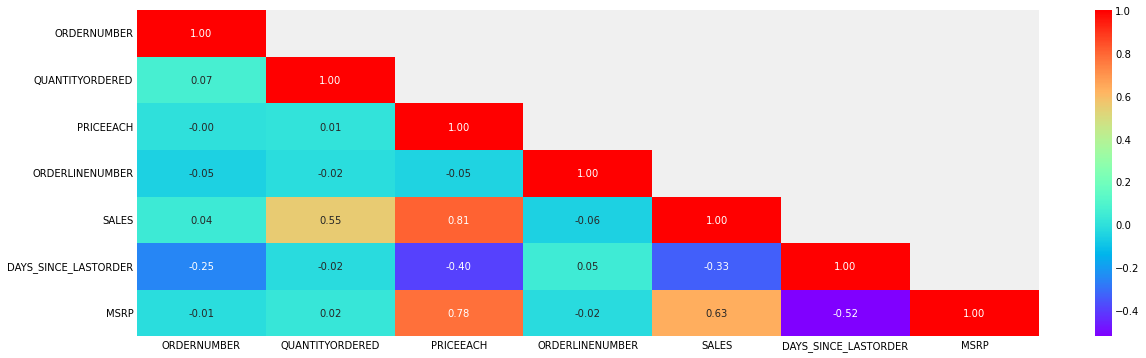

In [144]:
# Multivariate Analysis
corr=df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:20].corr(),+1))
plt.show();

In [145]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.5)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
PRICEEACH,SALES,0.808287
MSRP,PRICEEACH,0.778393
SALES,MSRP,0.634849
QUANTITYORDERED,SALES,0.553359
MSRP,DAYS_SINCE_LASTORDER,0.524285


In [146]:
# Dropping the variable with high collenearity
df=df.drop(labels=['PRICEEACH'],axis=1)
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


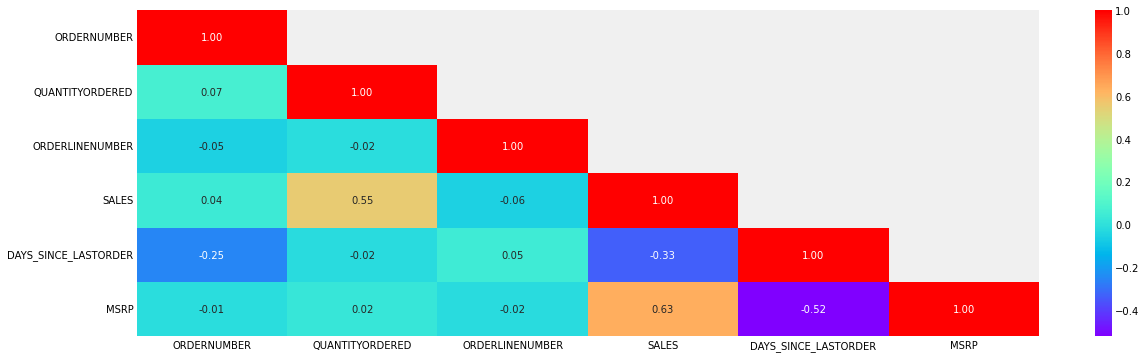

In [147]:
# Multivariate Analysis
corr=df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:20].corr(),+1))
plt.show();

#### Insights:
There is presence of severe Outlier in sales, other variables have not so severity except the Order line number, and Day Since last order. 

There is linear relationship between sales and Price
Some meaningful relation among Sales and MSRP with correlation of .63.
Some postiove relation among Sales and Quantity ordered with correlation of 0.55


#### Outlier Detection and Treatment

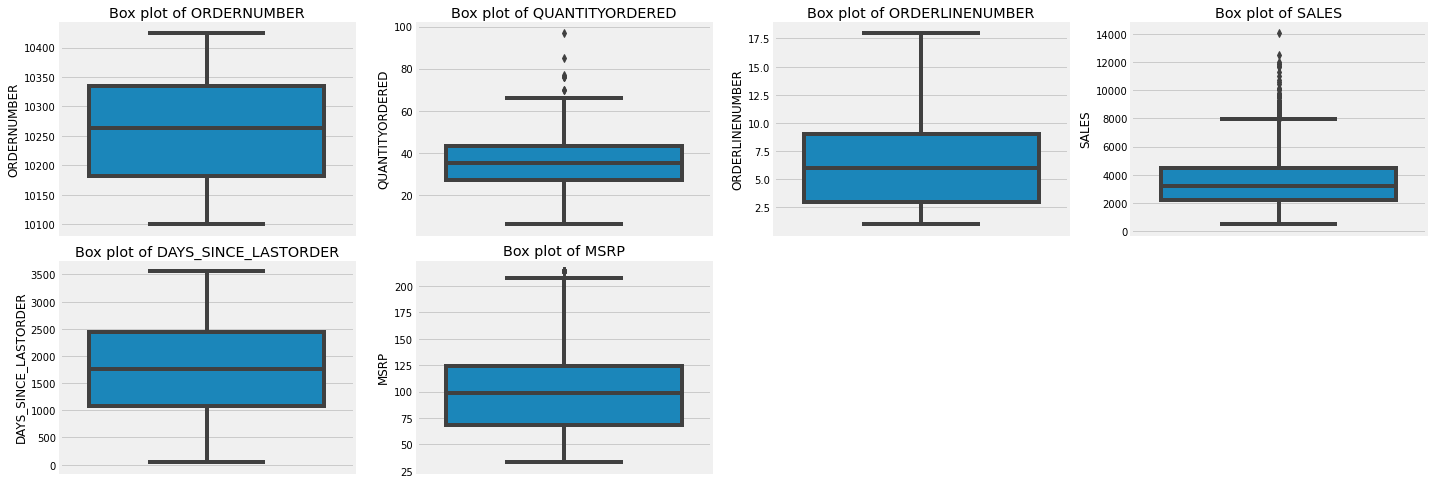

In [148]:
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('Box plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [149]:
# Treatment of Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [150]:
for column in dfnum.columns:
    lr,ur=remove_outlier(dfnum[column])
    dfnum[column]=np.where(dfnum[column]>ur,ur,dfnum[column])
    dfnum[column]=np.where(dfnum[column]<lr,lr,dfnum[column])

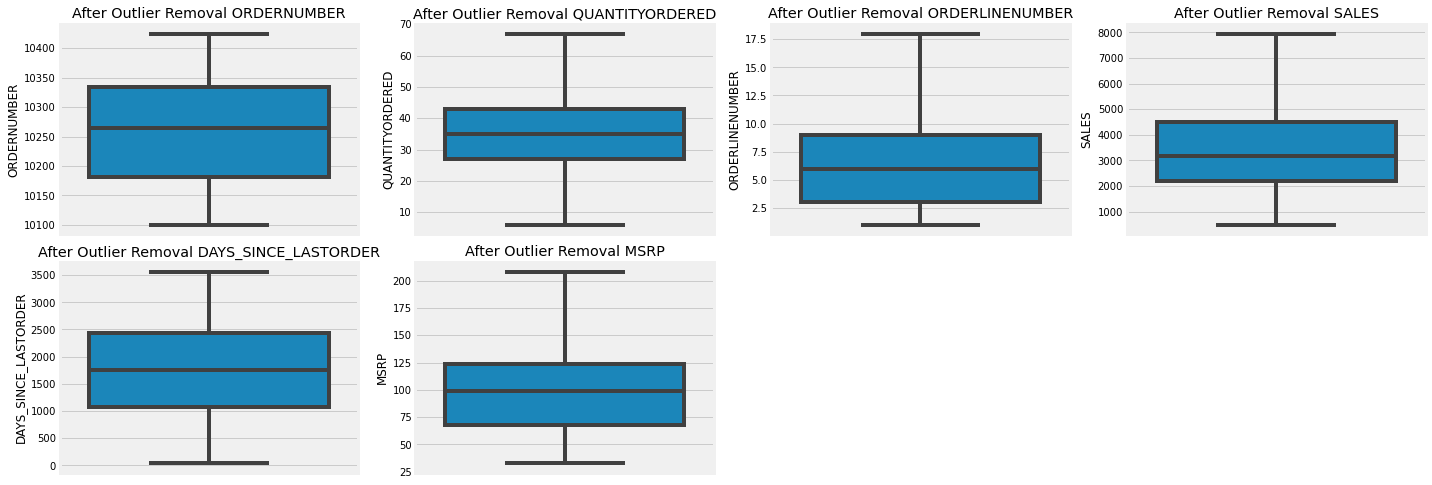

In [151]:
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('After Outlier Removal {}'.format(feature_list[i]))
    plt.tight_layout()

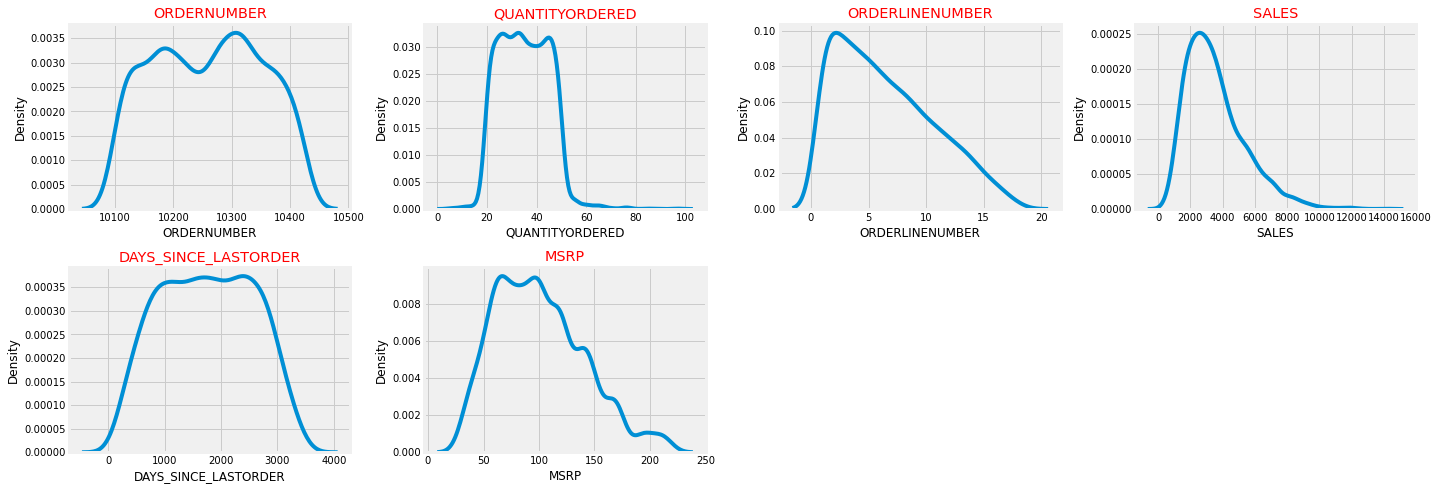

In [22]:
#Data Distribution of each variable after feature engineering
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

### Time series Analysis

In [152]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [153]:
df.set_index(keys='ORDERDATE',inplace=True)
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,
2018-02-24,10107,30,2,2871.00,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
2018-05-07,10121,34,5,2765.90,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2018-07-01,10134,41,2,3884.34,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
2018-08-25,10145,45,6,3746.70,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
2018-10-28,10168,36,1,3479.76,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


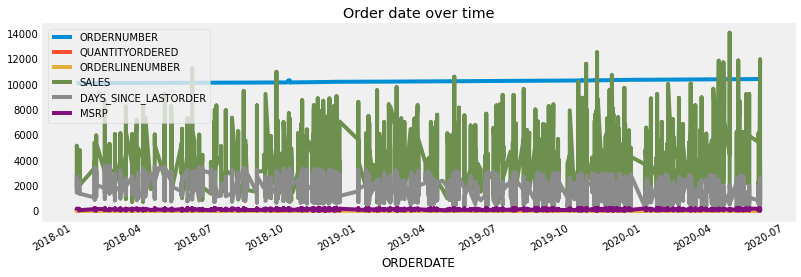

In [154]:
#Plotting the sales TS data
df.plot()
plt.grid()
plt.title('Order date over time');


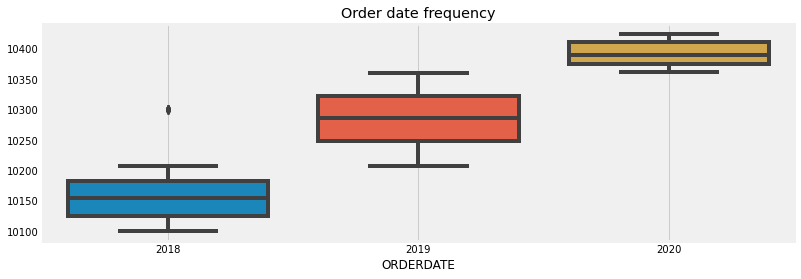

In [155]:
# Quarterly box plot
_, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency');

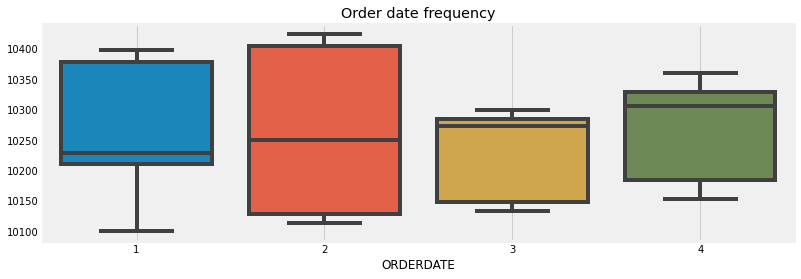

In [27]:
# Quarterly box plot
_, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=df.index.quarter,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency');

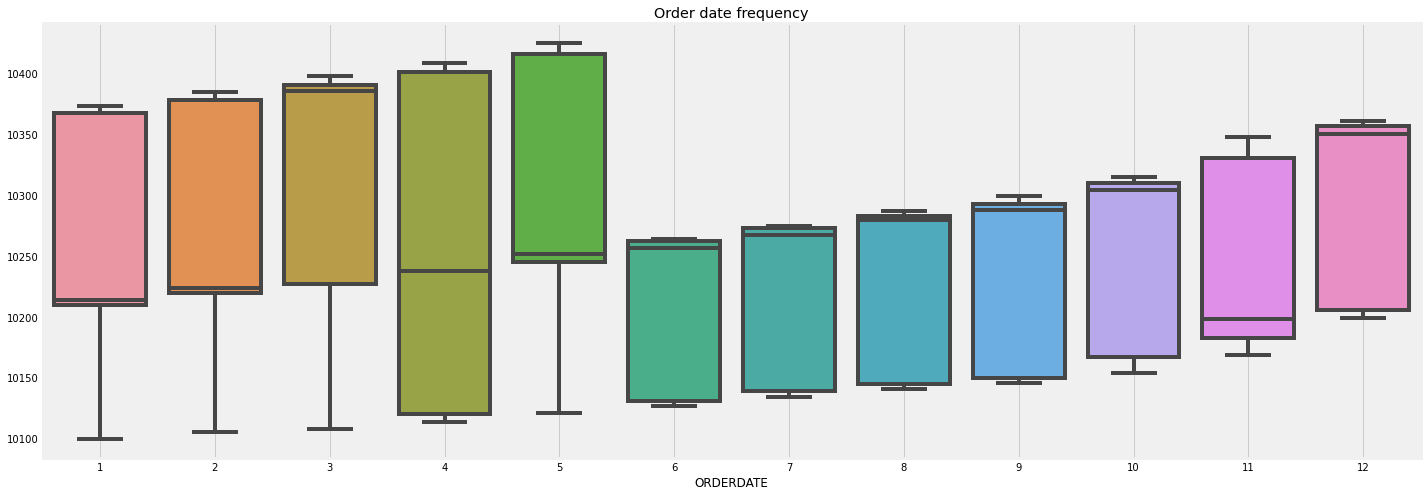

In [28]:
# Monthly box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency');


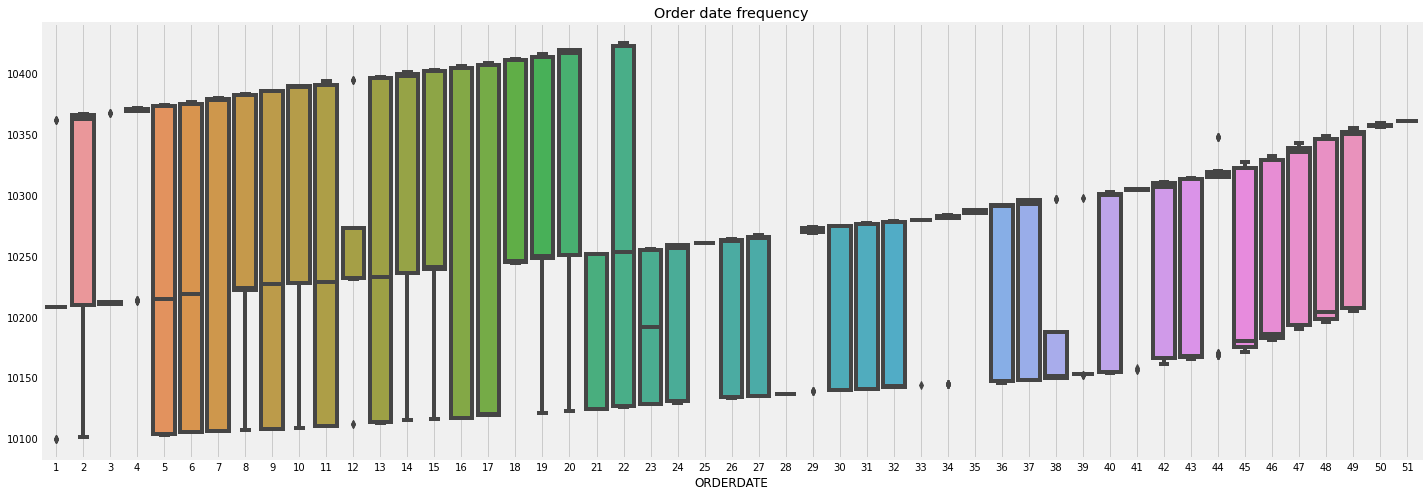

In [29]:
# Weekly box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.week,y=df.values[:,0],ax=ax)
plt.grid()
plt.title('Order date frequency');


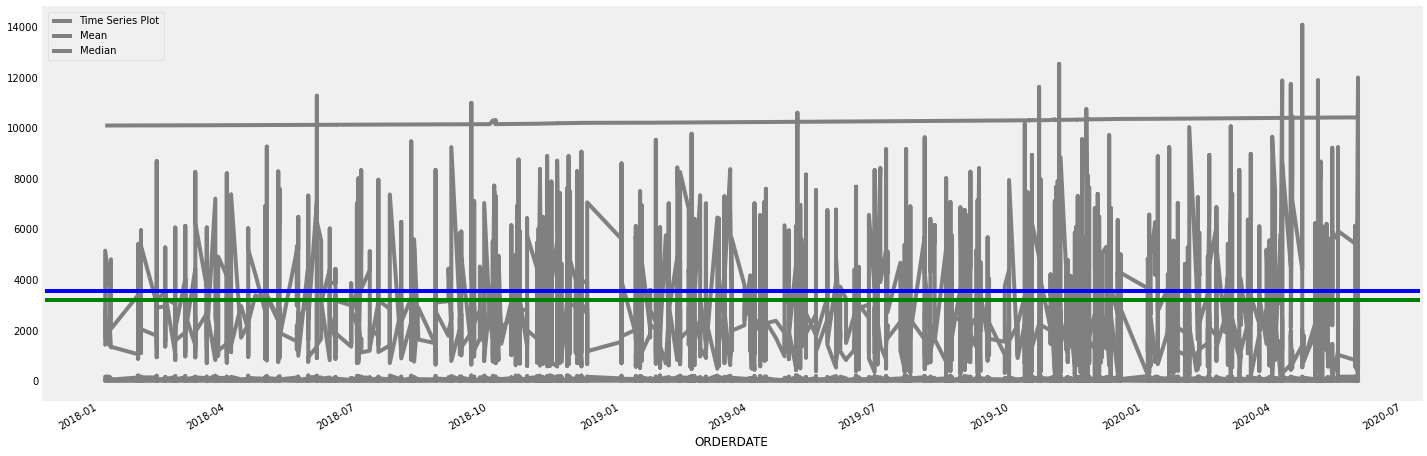

In [30]:
#Plot the Time series along with the mean and median of the Time series in the graph 
#to get an understanding of the fluctuation of the data from these two measures of central tendency.
rcParams['figure.figsize'] = 22,8
df.plot(color='grey')
plt.axhline(df['SALES'].mean(),color='Blue')
plt.axhline(df['SALES'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

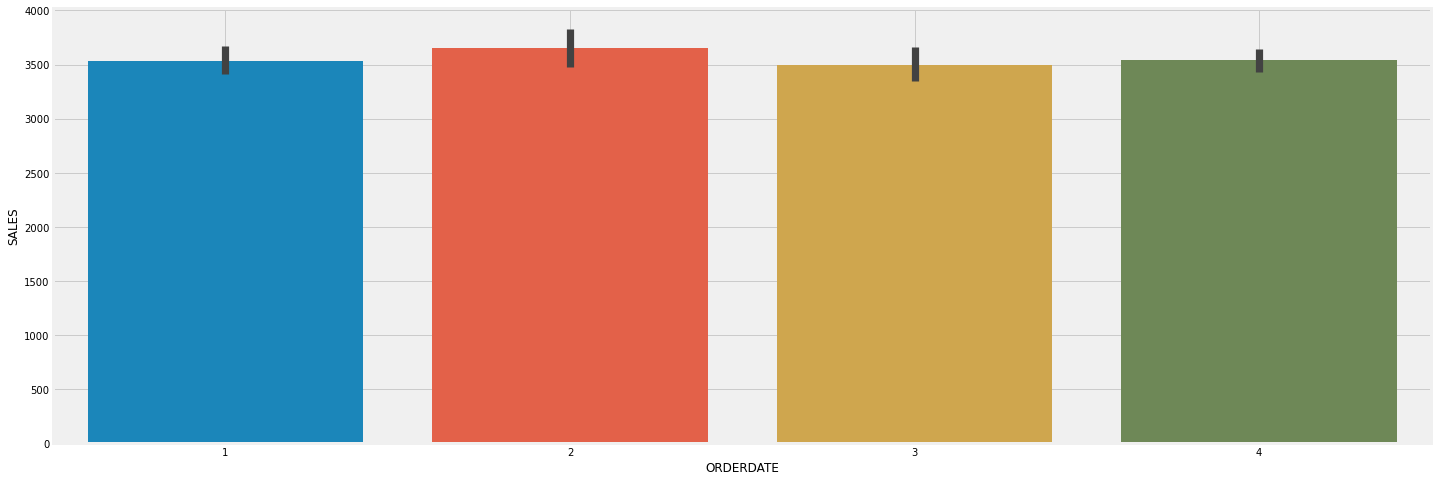

In [31]:
#sns.barplot(df.index.quarter,df.Shipments,data=df)
plt.grid();
sns.barplot(df.index.quarter,df.SALES,data=df)
plt.grid();

In [32]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'SALES', columns = df.index.month_name(), index = df.index.year)
quarterly_sales_across_years

ORDERDATE,April,August,December,February,January,July,June,March,May,November,October,September
ORDERDATE,,,,,,,,,,,,
2018,3476.026724,3410.505172,3753.088571,3435.029024,3327.015385,3754.6376,3653.968696,3541.120909,3321.950172,3479.181284,3616.556048,3473.333684
2019,3221.064375,3469.934361,3389.115091,3621.157326,3526.362651,3594.9900,3372.637882,3673.816607,3695.113378,3613.308157,3477.511006,3376.325368
2020,4672.023036,NaN,NaN,3618.840000,3429.731515,NaN,NaN,3530.780755,3815.508833,NaN,NaN,NaN


In [33]:
df_monthly = df.resample('M').sum()
df_qtrly = df.resample('Q').sum()
df_yearly = df.resample('Y').sum()
df_weekly = df.resample('W').sum()

#### Trend and Seasonal Decomposition of Sales

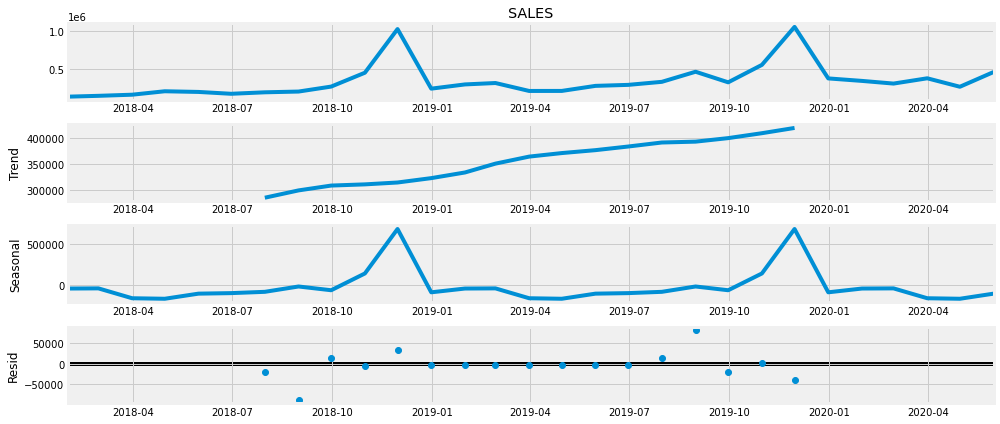

In [34]:
#Decomposition of Monthly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_monthly['SALES'], model='additive')
decomposition.plot();

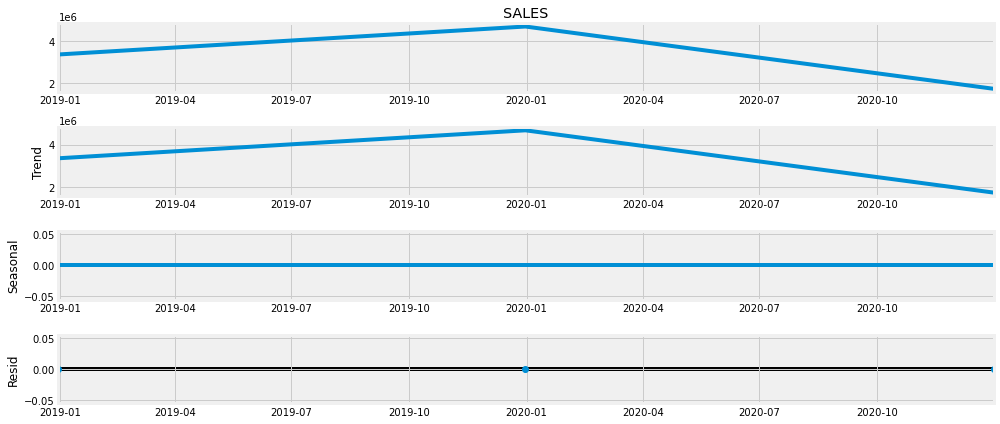

In [35]:
# Decomposition of Yearly sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_yearly['SALES'], model='additive')
decomposition.plot();

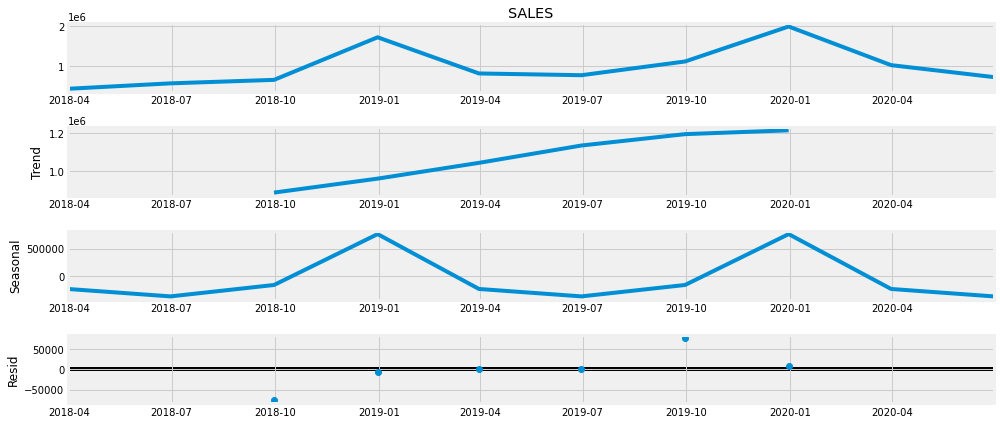

In [36]:
#Quarterly decomposition of sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_qtrly['SALES'], model='additive')
decomposition.plot();

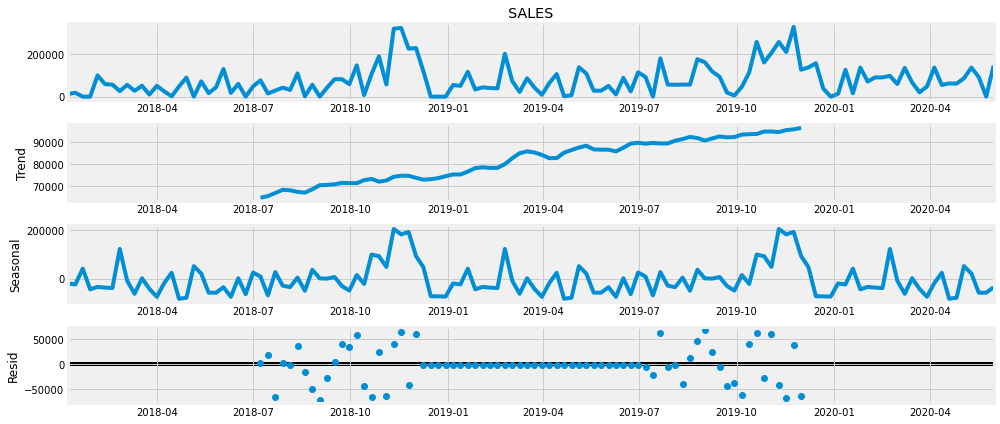

In [37]:
# Weekly decomposition of sales
rcParams['figure.figsize'] = 14,6
decomposition = seasonal_decompose(df_weekly['SALES'], model='additive')
decomposition.plot();

In [156]:
# Cross tab with Sales
productline = pd.pivot_table(df, values = 'SALES', columns = df['PRODUCTLINE'])
productline

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
SALES,4049.387292,3525.598051,3188.563882,3043.648783,2938.226883,3767.997254,3120.337962


In [41]:
Country = pd.pivot_table(df, values = ['SALES','QUANTITYORDERED','DAYS_SINCE_LASTORDER'], columns = df['COUNTRY'])
Country

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
DAYS_SINCE_LASTORDER,1606.610811,1575.727273,1763.787879,1923.242857,1806.301587,1751.673913,1739.633758,1695.225806,1939.062500,1847.628319,1802.538462,1746.788235,2080.000000,1750.443038,1860.093567,1566.473684,1362.935484,1872.701389,1737.018319
QUANTITYORDERED,33.762162,35.890909,32.545455,32.757143,34.873016,34.695652,35.318471,34.645161,30.625000,33.389381,35.423077,33.435294,36.961538,34.936709,36.342105,35.192982,34.774194,34.812500,35.581897
SALES,3408.773514,3673.864182,3285.230909,3201.122286,3899.002381,3582.412065,3537.950701,3556.001452,3609.776875,3315.701858,3618.611731,3617.220000,3615.989615,3651.752025,3554.640117,3684.459825,3797.211613,3325.558750,3615.922080


In [42]:
Deal= pd.pivot_table(df, values = ['SALES','QUANTITYORDERED','DAYS_SINCE_LASTORDER'], columns = df['DEALSIZE'])
Deal

DEALSIZE,Large,Medium,Small
DAYS_SINCE_LASTORDER,1041.736842,1630.498888,1981.402889
QUANTITYORDERED,47.328947,37.960712,30.517657
SALES,8282.607895,4396.761653,2062.627480


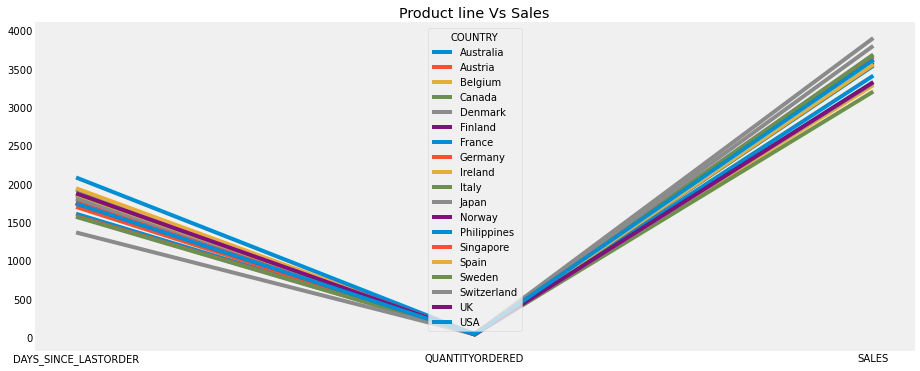

In [43]:
#Plotting the sales TS data
Country.plot()
plt.grid()
plt.title('Product line Vs Sales');

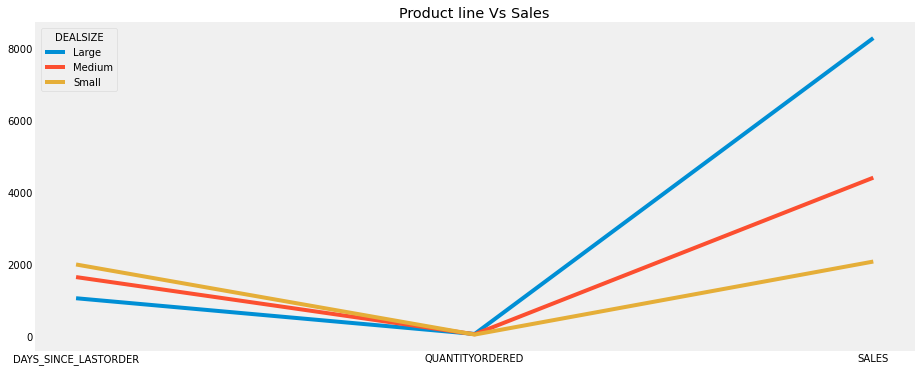

In [48]:
#Plotting the sales TS data
Deal.plot()
plt.grid()
plt.title('Product line Vs Sales');

In [77]:
df_cat=pd.read_excel('Sales_Data_RFM.Xlsx')

In [78]:
df_cat.head()

,PHONE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Monetory,Recency,ORDERDATE [Binned],Monetory [Binned],Recency [Binned],MONETORY Cat,FREQUENCY Cat,RECENCY Cat
0,(02) 5554 67,25,25,93.494400,25,2998.900800,25,1848.840000,25,25,...,Catherine,Medium,74972.52,1075,Bin 2,Bin 2,Bin 1,LM,LM,HIGH
1,(071) 23 67 2555,8,8,115.195000,8,4180.012500,8,1498.000000,8,8,...,Pascale,Medium,33440.10,1216,Bin 1,Bin 1,Bin 2,LOW,LOW,UM
2,(1) 42.34.2555,23,23,113.650435,23,4226.246957,23,1728.391304,23,23,...,Marie,Medium,97203.68,1267,Bin 2,Bin 3,Bin 3,UM,LM,LM
3,(1) 47.55.6555,27,27,94.255185,27,3450.765185,27,1763.444444,27,27,...,Dominique,Medium,93170.66,1128,Bin 3,Bin 3,Bin 1,UM,UM,HIGH
4,(171) 555-0297,26,26,96.993462,26,3415.557692,26,2156.461538,26,26,...,Ann,Medium,88804.50,1254,Bin 2,Bin 3,Bin 2,UM,LM,UM


In [79]:
pivot_table = pd.pivot_table(df_cat, values=None, index=['MONETORY Cat'], columns=['FREQUENCY Cat', 'RECENCY Cat'], aggfunc=len)

print(pivot_table)

              ADDRESSLINE1                                               ...  \
FREQUENCY Cat         HIGH                  LM                 LOW       ...   
RECENCY Cat           HIGH   LM  LOW   UM HIGH   LM  LOW   UM HIGH   LM  ...   
MONETORY Cat                                                             ...   
HIGH                   9.0  3.0  1.0  6.0  NaN  NaN  NaN  NaN  NaN  NaN  ...   
LM                     NaN  NaN  NaN  NaN  5.0  7.0  3.0  2.0  1.0  1.0  ...   
LOW                    NaN  NaN  NaN  NaN  1.0  NaN  3.0  NaN  NaN  2.0  ...   
UM                     1.0  NaN  NaN  1.0  1.0  4.0  1.0  2.0  NaN  NaN  ...   

              STATUS                                                
FREQUENCY Cat     LM       LOW                   UM                 
RECENCY Cat      LOW   UM HIGH   LM   LOW   UM HIGH   LM  LOW   UM  
MONETORY Cat                                                        
HIGH             NaN  NaN  NaN  NaN   NaN  NaN  1.0  1.0  NaN  1.0  
LM            

In [80]:
grouped = df_cat.groupby(['MONETORY Cat', 'FREQUENCY Cat', 'RECENCY Cat']).count()
grouped

PHONE  ORDERNUMBER  QUANTITYORDERED  \
MONETORY Cat FREQUENCY Cat RECENCY Cat                                        
HIGH         HIGH          HIGH             9            9                9   
                           LM               3            3                3   
                           LOW              1            1                1   
                           UM               6            6                6   
             UM            HIGH             1            1                1   
                           LM               1            1                1   
                           UM               1            1                1   
LM           LM            HIGH             5            5                5   
                           LM               7            7                7   
                           LOW              3            3                3   
                           UM               2            2                2   
             LOW           HIGH             1            1                1   
                           LM               1            1                1   
                           LOW              2            2                2   
             UM            UM               1            1                1   
LOW          LM            HIGH             1            1                1   
                           LOW              3            3                3   
             LOW           LM               2            2                2   
                           LOW             10           10               10   
                           UM               6            6                6   
UM           HIGH          HIGH             1            1                1   
                           UM               1            1                1   
             LM            HIGH             1            1                1   
                           LM               4            4                4   
                           LOW              1            1                1   
                           UM               2            2                2   
             UM            HIGH             3            3                3   
                           LM               3            3                3   
                           LOW              2            2                2   
                           UM               4            4                4   

                                        PRICEEACH  ORDERLINENUMBER  SALES  \
MONETORY Cat FREQUENCY Cat RECENCY Cat                                      
HIGH         HIGH          HIGH                 9                9      9   
                           LM                   3                3      3   
                           LOW                  1                1      1   
                           UM                   6                6      6   
             UM            HIGH                 1                1      1   
                           LM                   1                1      1   
                           UM                   1                1      1   
LM           LM            HIGH                 5                5      5   
                           LM                   7                7      7   
                           LOW                  3                3      3   
                           UM                   2                2      2   
             LOW           HIGH                 1                1      1   
                           LM                   1                1      1   
                           LOW                  2                2      2   
             UM            UM                   1                1      1   
LOW          LM            HIGH                 1                1      1   
                           LOW                  3                3      3   
             LOW           LM                   

#### Insight: 
The first row and column indicate that there are 9 customers who fall into the category combination of HIGH MONETORY, HIGH RECENCY, and HIGH FREQUENCY. Similarly, the row and column for UM and LM indicate that there are customers who have high MONETORY values but lower RECENCY and FREQUENCY values, and so on for the other combinations.

### Best customers? (give at least 5) 

In [91]:
Best_Customers = df_cat[(df_cat['RECENCY Cat'] == 'HIGH') & (df_cat['FREQUENCY Cat'] == 'HIGH') & (df_cat['MONETORY Cat'] == 'HIGH')]
Best_Customers.head()

,PHONE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Monetory,Recency,ORDERDATE [Binned],Monetory [Binned],Recency [Binned],MONETORY Cat,FREQUENCY Cat,RECENCY Cat
13,(91) 555 94 44,259,259,97.383205,259,3522.371081,259,1791.092664,259,259,...,Diego,Large,912294.11,1074,Bin 4,Bin 4,Bin 1,HIGH,HIGH,HIGH
24,+61 2 9495 8555,46,46,95.189348,46,3295.021304,46,1681.847826,46,46,...,Adrian,Small,151570.98,1076,Bin 4,Bin 4,Bin 1,HIGH,HIGH,HIGH
35,0522-556555,39,39,111.147436,39,3656.444359,39,1664.051282,39,39,...,Maurizio,Large,142601.33,1095,Bin 4,Bin 4,Bin 1,HIGH,HIGH,HIGH
53,26.47.1555,41,41,94.342927,41,3293.730244,41,1840.609756,41,41,...,Paul,Small,135042.94,1136,Bin 4,Bin 4,Bin 1,HIGH,HIGH,HIGH
55,31 12 3555,36,36,108.037778,36,4028.933333,36,1924.805556,36,36,...,Jytte,Large,145041.60,1120,Bin 4,Bin 4,Bin 1,HIGH,HIGH,HIGH


In [157]:
# Lost Customers

Lost = df_cat[(df_cat['RECENCY Cat'] == 'LOW') & (df_cat['FREQUENCY Cat'] == 'LOW') & (df_cat['MONETORY Cat'] == 'LOW')]
Lost.head()

,PHONE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Monetory,Recency,ORDERDATE [Binned],Monetory [Binned],Recency [Binned],MONETORY Cat,FREQUENCY Cat,RECENCY Cat
7,(171) 555-7555,12,12,99.108333,12,3001.586667,12,2014.583333,12,12,...,Thomas,Medium,36019.04,1569,Bin 1,Bin 1,Bin 4,LOW,LOW,LOW
15,(95) 555 82 82,15,15,93.282667,15,3648.241333,15,1948.200000,15,15,...,Jose Pedro,Medium,54723.62,1312,Bin 1,Bin 1,Bin 4,LOW,LOW,LOW
17,+34 913 728 555,13,13,104.963077,13,3818.619231,13,2273.000000,13,13,...,Jesus,Large,49642.05,1513,Bin 1,Bin 1,Bin 4,LOW,LOW,LOW
18,+353 1862 1555,16,16,112.870000,16,3609.776875,16,1939.062500,16,16,...,Dean,Large,57756.43,1332,Bin 1,Bin 1,Bin 4,LOW,LOW,LOW
23,+49 89 61 08 9555,14,14,84.289286,14,2499.565714,14,2239.357143,14,14,...,Michael,Medium,34993.92,1333,Bin 1,Bin 1,Bin 4,LOW,LOW,LOW


In [158]:
# Layol Customers

Loyal_customers = df_cat[(df_cat['RECENCY Cat'] == 'UM') & (df_cat['FREQUENCY Cat'] == 'HIGH') & (df_cat['MONETORY Cat'] == 'HIGH')]
Loyal_customers.head()

,PHONE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Monetory,Recency,ORDERDATE [Binned],Monetory [Binned],Recency [Binned],MONETORY Cat,FREQUENCY Cat,RECENCY Cat
26,+65 221 7555,43,43,113.105581,43,4023.015814,43,1840.534884,43,43,...,Eric,Large,172989.68,1164,Bin 4,Bin 4,Bin 2,HIGH,HIGH,UM
31,02 9936 8555,46,46,106.424130,46,3347.741957,46,1463.586957,46,46,...,Anna,Small,153996.13,1157,Bin 4,Bin 4,Bin 2,HIGH,HIGH,UM
33,03 9520 4555,55,55,104.590182,55,3654.462000,55,1698.781818,55,55,...,Peter,Medium,200995.41,1258,Bin 4,Bin 4,Bin 2,HIGH,HIGH,UM
36,0695-34 6555,38,38,97.597368,38,3533.140263,38,1689.815789,38,38,...,Maria,Large,134259.33,1163,Bin 4,Bin 4,Bin 2,HIGH,HIGH,UM
47,2125557413,48,48,111.150833,48,4119.519583,48,1743.479167,48,48,...,Jeff,Large,197736.94,1256,Bin 4,Bin 4,Bin 2,HIGH,HIGH,UM


In [159]:
# At risk Customers

Atrisk_Customers = df_cat[(df_cat['RECENCY Cat'] == 'LM') & (df_cat['FREQUENCY Cat'] == 'LM') & (df_cat['MONETORY Cat'] == 'LM')]
Atrisk_Customers.head()

,PHONE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,CONTACTFIRSTNAME,DEALSIZE,Monetory,Recency,ORDERDATE [Binned],Monetory [Binned],Recency [Binned],MONETORY Cat,FREQUENCY Cat,RECENCY Cat
8,(198) 555-8888,26,26,88.978846,26,3009.263077,26,2180.807692,26,26,...,Helen,Medium,78240.84,1286,Bin 2,Bin 2,Bin 3,LM,LM,LM
10,(604) 555-3392,22,22,105.340909,22,3419.950909,22,1620.045455,22,22,...,Yoshi,Large,75238.92,1296,Bin 2,Bin 2,Bin 3,LM,LM,LM
14,(93) 203 4555,23,23,88.783478,23,3409.211304,23,2483.913043,23,23,...,Eduardo,Medium,78411.86,1263,Bin 2,Bin 2,Bin 3,LM,LM,LM
22,+49 69 66 90 2555,22,22,108.031364,22,3871.435909,22,1697.318182,22,22,...,Roland,Medium,85171.59,1282,Bin 2,Bin 2,Bin 3,LM,LM,LM
49,2125558493,20,20,109.803500,20,3889.760000,20,1931.600000,20,20,...,Maria,Medium,77795.20,1266,Bin 2,Bin 2,Bin 3,LM,LM,LM


#### Assumptions: In RFM analysis in KNIME, some assumptions are made, such as:

All customers are treated equally, regardless of their demographics or purchase history.
The time period for calculating RFM scores is typically set to the past given periods.
The scores for each parameter (Recency, Frequency, Monetary) are typically divided into four quintiles (LOW, LM,UM, HIGH), with a score of LOW indicating the lowest value and a score of HIGH indicating the highest value.
The final RFM score is usually calculated by concatenating the scores for each parameter.

#### What is RFM ?  What all parameters used and assumptions made
RFM stands for Recency, Frequency, and Monetary value analysis. It is a marketing technique that is widely used for customer segmentation. It is based on the idea that customer behavior and purchasing patterns can be analyzed by considering three key factors:

Recency: How recently did the customer make a purchase?
Frequency: How often does the customer make a purchase?
Monetary value: How much does the customer spend on each purchase?
In the above problem, the RFM analysis was done on a table that has four categories of Recency, Frequency, and Monetary values (R, F, M). The categories for Recency and Monetary values were divided into four equal parts (High, Upper Mid, Lower Mid, and Low), whereas, for Frequency, it was divided into three categories (High, Medium, and Low).

Assumptions made in the above problem are:

Customers who have made recent purchases are more likely to make more purchases in the future.
Customers who have made more purchases in the past are more likely to make more purchases in the future.
Customers who have spent more money on their purchases are more valuable to the company.







#### FInal Insights:
#### Best Customers
Customers who have a high recency, high frequency, and high monetary value are the most valuable customers for the company, as they have made recent purchases, have made purchases frequently, and have spent a lot of money on their purchases. There are 9 such customers in the dataset.


Customers who have a high recency, high frequency, and low monetary value are still valuable, but not as much as the first group, as they have made recent and frequent purchases, but have spent less money. There is only 1 such customer in the dataset.

Customers who have a high recency, medium frequency, and medium monetary value are still valuable, but again, not as much as the first group. They have made recent purchases, but not as frequently as the first group, and have spent less money. There is only 1 such customer in the dataset.

Customers who have a high recency, low frequency, and high monetary value are valuable, but have not made recent purchases. They have only made a few purchases, but have spent a lot of money. There is only 1 such customer in the dataset.

Customers who have a medium recency, high frequency, and high monetary value are also valuable, as they have made frequent purchases and spent a lot of money, but it has been some time since their last purchase. There is only 1 such customer in the dataset.

#### Customers are on the verge of churning
Customers who have a Lower medium recency, Low frequency, and low monetary value are not as valuable, as they have made purchases somewhat recently and somewhat frequently, but have spent relatively little money. There are 3 such customers in the dataset.

#### Lost customers
Customers who have a Low recency, low frequency, and low monetary value are the least valuable customers in the dataset, as they have made purchases some how in past, but not frequently, and have spent relatively little money. There are 10 such customers in the dataset.







#### Potential Loyalists 
are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.

#### At Risk Customers 
Customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

#### RFM
RFM is a data-driven customer segmentation technique that allows marketers to take tactical decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with differentiated and personalized marketing strategies. This in turn improves user engagement and retention
               
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

               Recency: How recently a customer has made a purchase
               Frequency: How often a customer makes a purchase
               Monetary value: How much money a customer spends on purchases


RFM analysis allows a comparison between potential contributors and clients. It gives organizations a sense of how much revenue comes from repeat customers (vs. new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers


-------------------------------------------------Thank You------------------------------------------